In [9]:
import sys
import dill as pickle
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../src/covid_model_deaths_spline')
from mr_spline import *

MODEL_LABEL = '2020_05_26_cfrmod_noprior'

In [50]:
location_id = 573

with open(f'/ihme/covid-19/deaths/dev/{MODEL_LABEL}/models/{location_id}.pkl', 'rb') as fread:
    mr_model = pickle.load(fread)

data_y = mr_model.mr_model.data.obs.values
data_x = mr_model.mr_model.data.covs.iloc[:,1].values
min_val = data_x.min()
max_val = data_x.max()    
x_vals = np.linspace(min_val, max_val, 100)

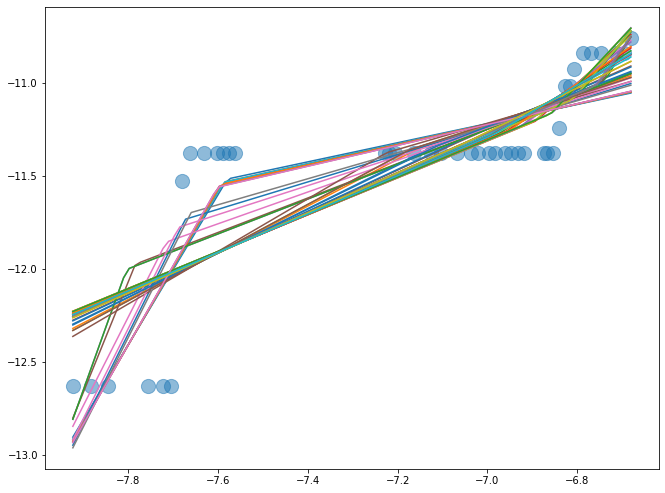

In [53]:
plt.figure(figsize=(11, 8.5))
plt.scatter(data_x,
            data_y,
            alpha=0.5, s=200)
for knots, model in zip(mr_model.mr_model.ensemble_knots, mr_model.mr_model.sub_models):
    x_mat = model.linear_cov_models[1].spline.design_mat(x_vals)
    betas = model.beta_soln.copy()
    if np.isnan(betas).any():
        raise ValueError('Bad submodel')
    betas[1:] += betas[0]
    plt.plot(x_vals, x_mat.dot(betas))
    

In [56]:
mr_model.mr_model.weights

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])